In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split
from prep_plays import explore_plays_data, prep_plays_data
from wrangle_plays_data import train_validate_test, min_max_scale

In [20]:
 df = prep_plays_data()

In [21]:
train_validate, test = train_test_split(df, test_size=.3, random_state=123, stratify = df.pass_stopped)

    # split train_validate off into train (60% of 70% = 42%) and validate (40% of 70% = 28%)
train, validate = train_test_split(train_validate, test_size=.4, random_state=123, stratify = train_validate.pass_stopped)

In [35]:
train.T

,12331,9633,13947,15562,5458,9060,7240,11494,3899,4911,...,13238,4813,15921,5634,7271,14217,15210,7739,14947,641
playDescription,(13:52) (Shotgun) J.Goff pass incomplete short...,(8:58) (Shotgun) M.Barkley pass incomplete dee...,"(2:01) (No Huddle, Shotgun) K.Cousins pass inc...",(1:00) (Shotgun) J.Driskel pass short right to...,"(13:45) (No Huddle, Shotgun) E.Manning pass in...",(5:31) (Shotgun) A.Rodgers pass incomplete dee...,(:16) (Shotgun) C.Beathard pass short left to ...,(14:53) N.Mullens pass incomplete deep right t...,"(:44) (No Huddle, Shotgun) R.Wilson pass short...",(4:29) (Shotgun) J.Flacco pass short left to M...,...,(:41) (Shotgun) T.Brady pass short middle to J...,(7:27) (Shotgun) M.Stafford pass incomplete sh...,(5:56) (Shotgun) R.Tannehill pass short left t...,(1:00) (Shotgun) A.Dalton pass short middle to...,(9:11) (Shotgun) E.Manning pass short right to...,(4:41) (Shotgun) M.Stafford pass short right t...,(1:44) (Shotgun) J.Allen pass short left to R....,(4:41) (Shotgun) J.Winston pass incomplete dee...,"(1:22) (No Huddle, Shotgun) C.Newton pass inco...",(1:41) (Shotgun) S.Bradford pass short middle ...
quarter,4,4,4,3,4,3,2,3,4,4,...,1,3,1,2,1,4,1,1,4,4
down,1,3,1,2,1,3,3,1,1,1,...,2,2,3,1,2,1,2,3,2,2
yardsToGo,15,9,10,10,10,7,10,10,10,10,...,9,8,4,10,17,10,10,8,1,10
team_by_comp_yds,5,31,14,24,10,7,17,17,30,21,...,9,20,28,24,10,20,31,1,15,32
defendersInTheBox,5,6,5,5,6,6,5,7,6,6,...,7,6,6,6,4,7,6,5,6,6
numberOfPassRushers,4,4,4,4,4,4,4,5,6,4,...,4,5,4,5,4,5,4,5,5,4
QB_under_pressure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gameClock,13:52:00,08:58:00,02:01:00,01:00:00,13:45:00,05:31:00,00:16:00,14:53:00,00:44:00,04:29:00,...,00:41:00,07:27:00,05:56:00,01:00:00,09:11:00,04:41:00,01:44:00,04:41:00,01:22:00,01:41:00
absoluteYardlineNumber,65,63,75,31,50,106,20,94,70,76,...,27,71,65,66,59,40,70,74,39,50


# Formations and Pass Stopped

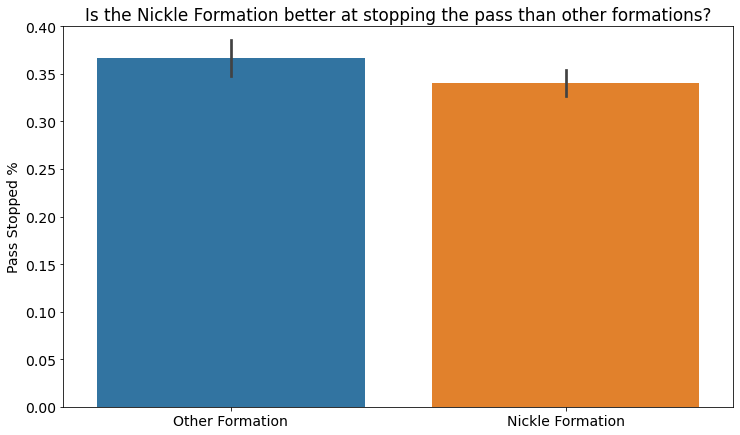

In [65]:
sns.barplot(data=train,x='nickel', y='pass_stopped').set(ylim=(0, .40))
plt.xlabel('')
plt.ylabel('Pass Stopped %')
plt.title("Is the Nickle Formation better at stopping the pass than other formations?")
plt.xticks([0,1], ['Other Formation', 'Nickle Formation'])
plt.show()

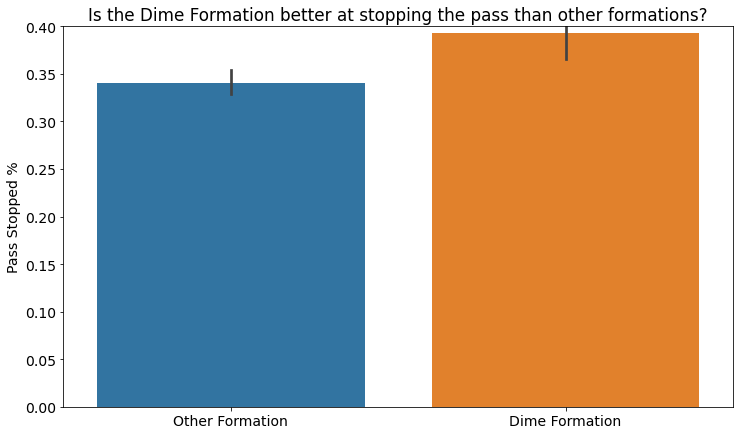

In [63]:
sns.barplot(data=train,x='dime', y='pass_stopped').set(ylim=(0, .40))
plt.xlabel('')
plt.ylabel('Pass Stopped %')
plt.title("Is the Dime Formation better at stopping the pass than other formations?")
plt.xticks([0,1], ['Other Formation', 'Dime Formation'])
plt.show()

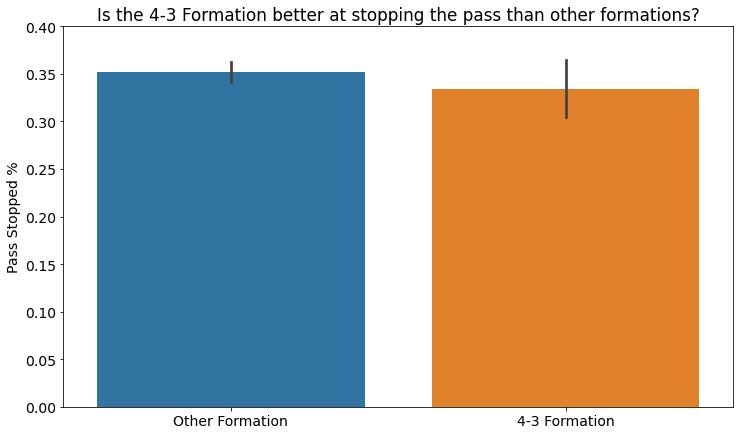

In [61]:
sns.barplot(data=train,x='four_three', y='pass_stopped').set(ylim=(0, .40))
plt.xlabel('')
plt.ylabel('Pass Stopped %')
plt.title("Is the 4-3 Formation better at stopping the pass than other formations?")
plt.xticks([0,1], ['Other Formation', '4-3 Formation'])
plt.show()

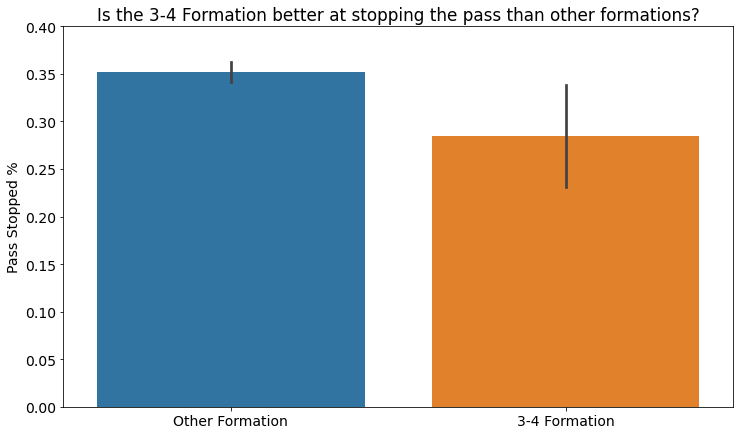

In [60]:
sns.barplot(data=train,x='three_four', y='pass_stopped').set(ylim=(0, .40))
plt.xlabel('')
plt.ylabel('Pass Stopped %')
plt.title("Is the 3-4 Formation better at stopping the pass than other formations?")
plt.xticks([0,1], ['Other Formation', '3-4 Formation'])
plt.show()

# Downs and Pass Stopped

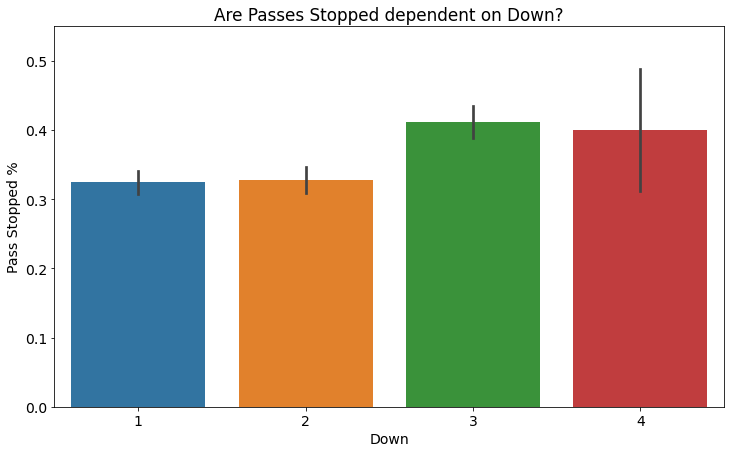

In [72]:
sns.barplot(data=train,x='down', y='pass_stopped').set(ylim=(0, .55))
plt.xlabel('Down')
plt.ylabel('Pass Stopped %')
plt.title("Are Passes Stopped dependent on Down?")
plt.show()

# QB Pressure and Pass Stopped

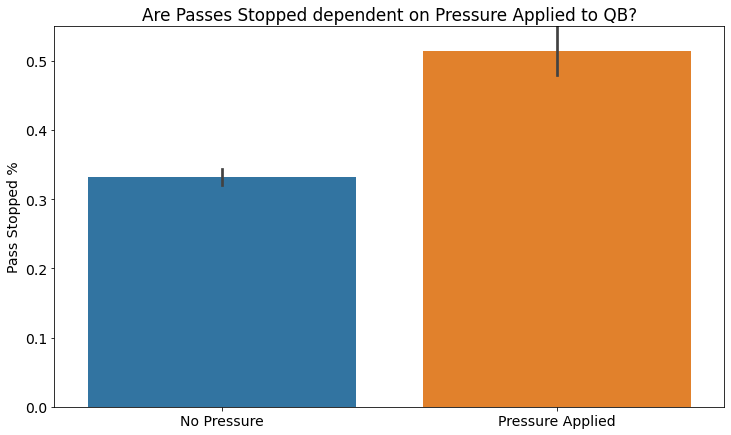

In [89]:
sns.barplot(data=train,x='QB_under_pressure', y='pass_stopped').set(ylim=(0, .55))
plt.xlabel('')
plt.ylabel('Pass Stopped %')
plt.xticks([0,1], ['No Pressure', 'Pressure Applied'])
plt.title("Are Passes Stopped dependent on Pressure Applied to QB?")
plt.show()

# Defenders in the Box and Pass Stopped

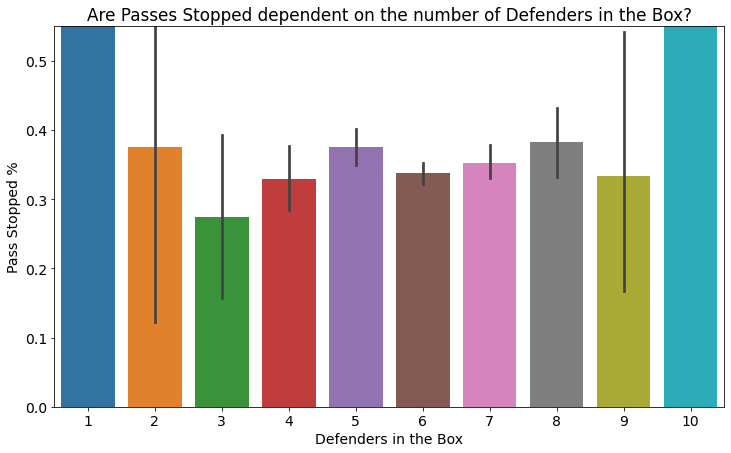

In [88]:
sns.barplot(data=train,x='defendersInTheBox', y='pass_stopped').set(ylim=(0, .55))
plt.xlabel('Defenders in the Box')
plt.ylabel('Pass Stopped %')
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.title("Are Passes Stopped dependent on the number of Defenders in the Box?")
plt.show()

In [78]:
train.defendersInTheBox.value_counts()

6.0     3305
7.0     1609
5.0     1309
4.0      449
8.0      382
3.0       51
9.0       24
2.0        8
10.0       2
1.0        1
Name: defendersInTheBox, dtype: int64

# Defensive Position and Pass Stopped

## DL 

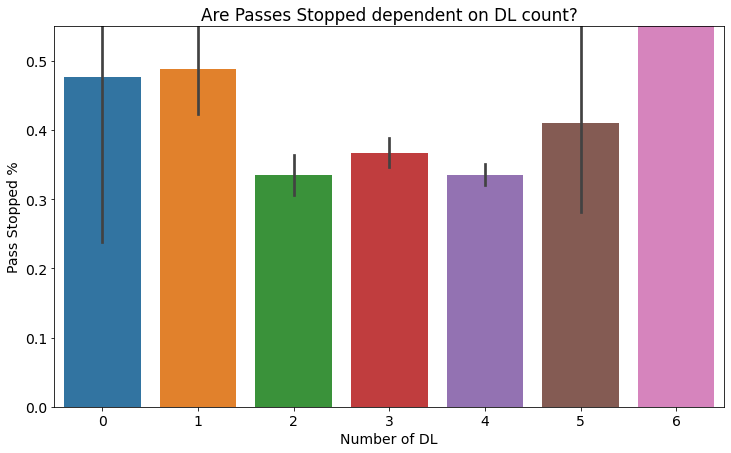

In [91]:
sns.barplot(data=train,x='DL', y='pass_stopped').set(ylim=(0, .55))
plt.xlabel('Number of DL')
plt.ylabel('Pass Stopped %')
# plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.title("Are Passes Stopped dependent on DL count?")
plt.show()

In [90]:
train.DL.value_counts()

4    3784
3    1901
2    1148
1     246
5      39
0      21
6       1
Name: DL, dtype: int64

## LB

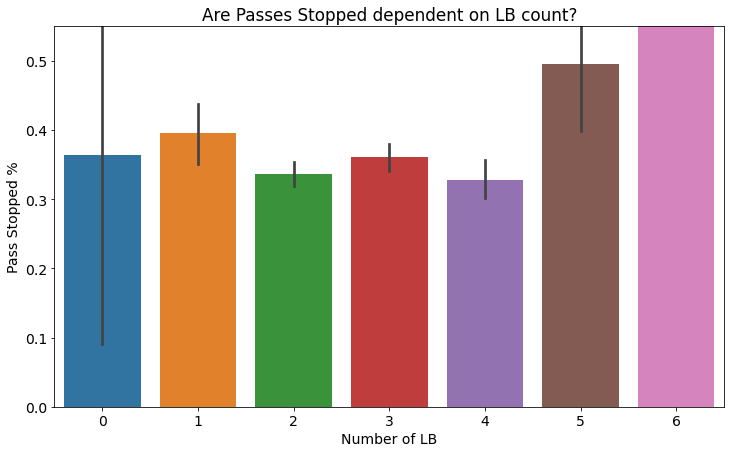

In [93]:
sns.barplot(data=train,x='LB', y='pass_stopped').set(ylim=(0, .55))
plt.xlabel('Number of LB')
plt.ylabel('Pass Stopped %')
# plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.title("Are Passes Stopped dependent on LB count?")
plt.show()

In [94]:
train.LB.value_counts()

2    2923
3    2469
4    1163
1     470
5     103
0      11
6       1
Name: LB, dtype: int64

## DB

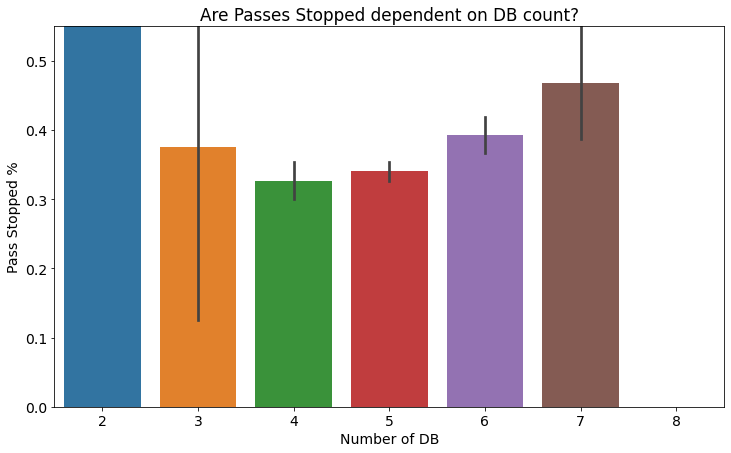

In [95]:
sns.barplot(data=train,x='DB', y='pass_stopped').set(ylim=(0, .55))
plt.xlabel('Number of DB')
plt.ylabel('Pass Stopped %')
# plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.title("Are Passes Stopped dependent on DB count?")
plt.show()

In [96]:
train.DB.value_counts()

5    4560
6    1286
4    1160
7     124
3       8
2       1
8       1
Name: DB, dtype: int64

# End